In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
val_output = pd.read_csv('../outputs/final_results.csv')
test_dir = '../dataset/test/images'

In [5]:
def object_detection(df=val_output, path=test_dir, change_width=False, image_path=False):
    
    if image_path != False:
        select_df = df[df.image_path == image_path].reset_index()
    else:
        df = df.sample(frac=1)
        image_path = df.iloc[0].image_path
        select_df = df[df.image_path == image_path].reset_index()
        
    print(image_path)
    image = cv2.cvtColor(cv2.imread(os.path.join(path, image_path)), cv2.COLOR_BGR2RGB)
    for i in select_df.index:
        xmin = select_df.iloc[i].xmin #* 2
        ymin = select_df.iloc[i].ymin #* 2
        xmax = select_df.iloc[i].xmax #* 2
        ymax = select_df.iloc[i].ymax #* 2
        label = select_df.iloc[i]['name']
        
        height = image.shape[0]
        width = image.shape[1]
        if change_width == True:
            width = 960
            image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
            xmax = xmax / 2
            xmin = xmin / 2

        print('class:' , select_df.iloc[i]['name'])
        print('xmin:' , xmin)
        print('ymin:' , ymin)
        print('xmax:' , xmax)
        print('ymax:' , ymax)
        print('----------------------------')
            
        cv2.rectangle(image,
                      (int(xmin) , int(ymin) ),
                      (int(xmax) , int(ymax) ),
                      (0,255,0), thickness=2)

        ((label_width, label_height), _) = cv2.getTextSize(label, fontFace=cv2.FONT_HERSHEY_PLAIN, 
        fontScale=1.75, thickness=2)

        cv2.rectangle(
      image,
      (int(xmin) , int(ymin)),
      (int(xmin + label_width + label_width * 0.05), int(ymin + label_height + label_height * 0.25)),
      color=(255, 0, 0),
      thickness=cv2.FILLED
    )

        cv2.putText(
      image,
      label,
      org=(int(xmin), int(ymin + label_height + label_height * 0.25)), 
      fontFace=cv2.FONT_HERSHEY_PLAIN,
      fontScale=1.75,
      color=(255, 255, 255),
      thickness=2 )

    plt.imshow(image)

            


ff70d044ebc529c4664193f29a1981d6.jpg
class: POTHOLES
xmin: 1302
ymin: 721
xmax: 1910
ymax: 1079
----------------------------
class: BAD_BILLBOARD
xmin: 440
ymin: 370
xmax: 640
ymax: 457
----------------------------
class: GRAFFITI
xmin: 1749
ymin: 433
xmax: 1919
ymax: 626
----------------------------
class: BAD_BILLBOARD
xmin: 0
ymin: 247
xmax: 124
ymax: 438
----------------------------
class: GRAFFITI
xmin: 0
ymin: 166
xmax: 127
ymax: 442
----------------------------


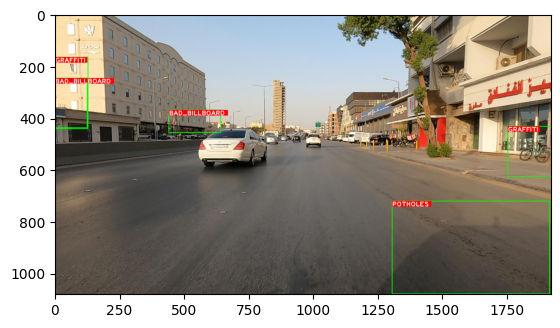

In [16]:
object_detection(  image_path = 'ff70d044ebc529c4664193f29a1981d6.jpg')